In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

In [3]:
import numpy as np
import cPickle as pickle
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

In [16]:
INFILE = '/data/icecube/data/mlarson/level7_24Nov2015/GENIE_parms/level7/14585.pkl'
WEIGHTS = '/data/icecube/data/mlarson/level7_24Nov2015/GENIE_parms/level7/14585_weights.hdf5'
input_file = pickle.load(open(INFILE, 'rb'))
weights = np.array(h5py.File(WEIGHTS, 'r')['weights'][:])
weights *= 3600 * 24 * 365
# n_files
# 12585: 275
#weights *= 1/275.
# 14585: 245
weights *= 1/245.

In [17]:
print(sorted(input_file.keys()))
print(input_file['energy'].shape)
print(weights.shape)
# nfp+nfpip+nfpim+nfkp+nfkm+nfother

['A', 'Ef', 'Ei', 'El', 'En', 'Ev', 'KEf', 'KEl', 'Q2', 'Q2s', 'W', 'Ws', 'Z', '_azimax', '_azimin', '_elogmax', '_elogmin', '_glbprbscale', '_gvold', '_gvoll', '_gvolr', '_ngennu', '_plawind', '_zenmax', '_zenmin', 'calresp0', 'cc', 'charm', 'coh', 'dfr', 'diffxsec', 'dis', 'em', 'energy', 'hitnuc', 'hitqrk', 'iev', 'imd', 'nc', 'neu', 'neut_code', 'nf', 'nfem', 'nfk0', 'nfkm', 'nfkp', 'nfn', 'nfother', 'nfp', 'nfpi0', 'nfpim', 'nfpip', 'ni', 'niem', 'nik0', 'nikm', 'nikp', 'nin', 'niother', 'nip', 'nipi0', 'nipim', 'nipip', 'nuance_code', 'nuel', 'pdgf', 'pdgi', 'pdgl', 'prob', 'pxf', 'pxi', 'pxl', 'pxn', 'pxv', 'pyf', 'pyi', 'pyl', 'pyn', 'pyv', 'pzf', 'pzi', 'pzl', 'pzn', 'pzv', 'qel', 'res', 'resc', 'resid', 'rw_AhtBY', 'rw_BhtBY', 'rw_CV1uBY', 'rw_CV2uBY', 'rw_MaCCQE', 'rw_MaCCRES', 'rw_MaCOHpi', 'rw_MaNCEL', 'rw_MaNCRES', 'sea', 't', 'tgt', 'tgtmass', 'ts', 'vtxt', 'vtxx', 'vtxy', 'vtxz', 'wght', 'x', 'xs', 'xsec', 'y', 'ys']
(509542,)
(509542,)


In [31]:
BINNING = np.linspace(0, 4, 100)

In [32]:
def make_plot(hist, tot_hist, name, xlabel, ylabel, outname, level):
    names = ['qel', 'res', 'dis']
    percent_hist = [x / tot_hist.astype(float) for x in hist]

    fig = plt.figure(figsize=[10, 8])
    if level == 0:
        fig.suptitle('Level0 (Generator level) '+name, y=1.005)
    else:
        fig.suptitle('Level7 (Final level) '+name, y=1.005)
    gs = gridspec.GridSpec(1, 1)
    gs0 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0], hspace=0, height_ratios=[1,1] )
    
    ax0 = fig.add_subplot(gs0[0])
    ax0.set_xlim(np.min(BINNING), np.max(BINNING))
    ax0.set_ylim([1E0, 1E5])
    #ax0.set_xscale('log')
    ax0.set_yscale('log')
    for xmaj in ax0.xaxis.get_majorticklocs():
        ax0.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    for ymaj in ax0.yaxis.get_majorticklocs():
        ax0.axhline(y=ymaj, ls=':', color='gray', alpha =0.7, linewidth=1)
    ax0.get_xaxis().set_ticks([])
    ax0.set_ylabel('# Events', size=18)
    
    zero_numpy_array_element = np.array([0])
    hist = np.hstack((tot_hist, zero_numpy_array_element))                                                                                                                           
    ax0.step(BINNING, hist, where='post', color='black')
    at = AnchoredText(r'Total # Events = {0}'.format(np.sum(tot_hist)),
                      prop=dict(size=16), frameon=True, loc=2)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.5")
    ax0.add_artist(at)
    
    ax1 = fig.add_subplot(gs0[1])
    ax1.set_xlabel(xlabel, size=18)
    # r'True E$_{\nu}$(GeV)'
    ax1.set_xlim(np.min(BINNING), np.max(BINNING))
    #ax1.set_xscale('log')
    for xmaj in ax1.xaxis.get_majorticklocs():
        ax1.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    for ymaj in ax1.yaxis.get_majorticklocs():
        ax1.axhline(y=ymaj, ls=':', color='gray', alpha =0.7, linewidth=1)
    ax1.set_ylabel(ylabel, size=18)
    ax1.set_ylim([0, 1.1])
    
    zero_numpy_array_element = np.array([0])
    for idx, x in enumerate(percent_hist):
        hist = np.hstack((x, zero_numpy_array_element))                                                                                                                           
        ax1.step(BINNING, hist, where='post', label=names[idx])

    ax1.legend()

    fig.tight_layout()
    # fig.savefig('./test.pdf', bbox_inches='tight')
    fig.savefig(outname, bbox_inches='tight')

/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


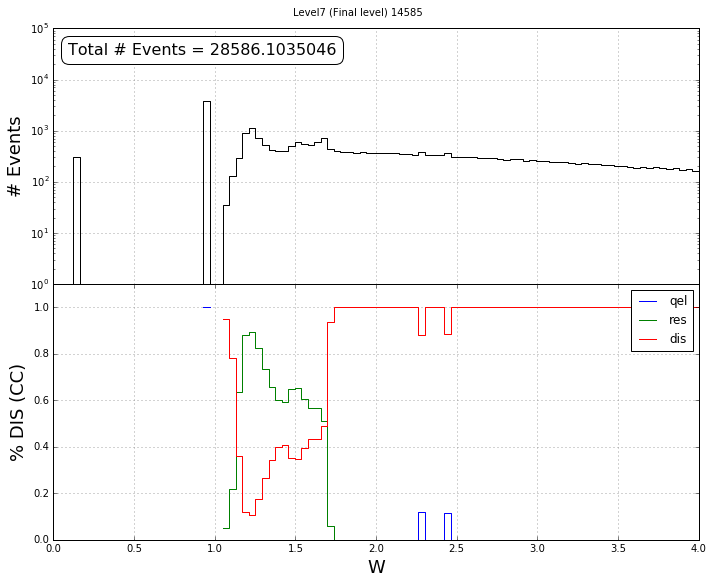

In [33]:
parm = 'Ws'
cc_map = input_file['cc'].astype(bool)
dis_hist, edges = np.histogram(
    (input_file[parm][cc_map])[input_file['dis'][cc_map].astype(bool)], bins=BINNING,
    weights=(weights[cc_map])[input_file['dis'][cc_map].astype(bool)]
)
res_hist, edges = np.histogram(
    (input_file[parm][cc_map])[input_file['res'][cc_map].astype(bool)], bins=BINNING,
    weights=(weights[cc_map])[input_file['res'][cc_map].astype(bool)]
)
qel_hist, edges = np.histogram(
    (input_file[parm][cc_map])[input_file['qel'][cc_map].astype(bool)], bins=BINNING,
    weights=(weights[cc_map])[input_file['qel'][cc_map].astype(bool)]
)
all_hist, edges = np.histogram(
    input_file[parm][cc_map], bins=BINNING,
    weights=weights[cc_map]
)
make_plot((qel_hist, res_hist, dis_hist), all_hist, '14585', r'W', r'% DIS (CC)', './images/level7/W/14585_cc_weights.png', 7)

/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


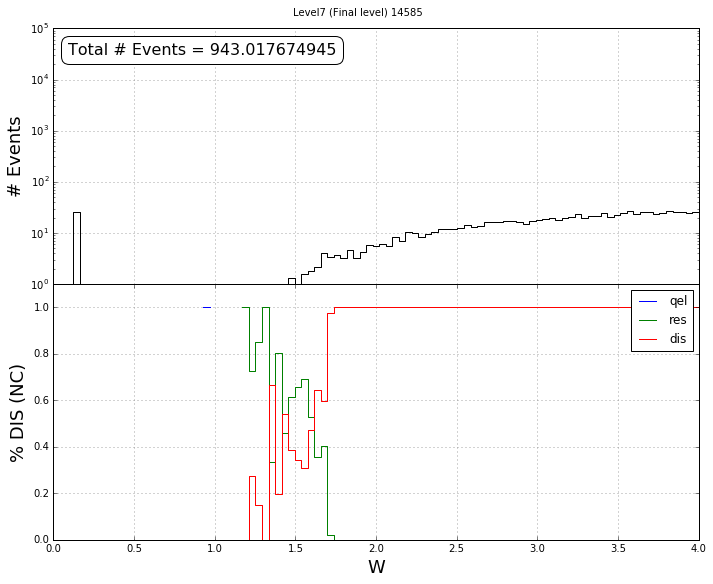

In [35]:
parm = 'Ws'
nc_map = input_file['nc'].astype(bool)
dis_hist, edges = np.histogram(
    (input_file[parm][nc_map])[input_file['dis'][nc_map].astype(bool)], bins=BINNING,
    weights=(weights[nc_map])[input_file['dis'][nc_map].astype(bool)]
)
res_hist, edges = np.histogram(
    (input_file[parm][nc_map])[input_file['res'][nc_map].astype(bool)], bins=BINNING,
    weights=(weights[nc_map])[input_file['res'][nc_map].astype(bool)]
)
qel_hist, edges = np.histogram(
    (input_file[parm][nc_map])[input_file['qel'][nc_map].astype(bool)], bins=BINNING,
    weights=(weights[nc_map])[input_file['qel'][nc_map].astype(bool)]
)
all_hist, edges = np.histogram(
    input_file[parm][nc_map], bins=BINNING,
    weights=weights[nc_map]
)
make_plot((qel_hist, res_hist, dis_hist), all_hist, '14585', r'W', r'% DIS (NC)', './images/level7/W/14585_nc_weights.png', 7)

/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


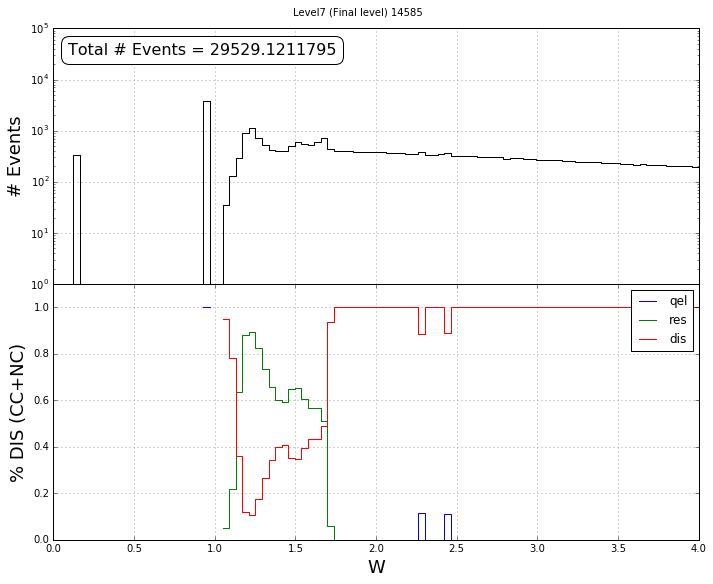

In [36]:
parm = 'Ws'
dis_hist, edges = np.histogram(
    input_file[parm][input_file['dis'].astype(bool)], bins=BINNING,
    weights=weights[input_file['dis'].astype(bool)]
)
res_hist, edges = np.histogram(
    input_file[parm][input_file['res'].astype(bool)], bins=BINNING,
    weights=weights[input_file['res'].astype(bool)]
)
qel_hist, edges = np.histogram(
    input_file[parm][input_file['qel'].astype(bool)], bins=BINNING,
    weights=weights[input_file['qel'].astype(bool)]
)
all_hist, edges = np.histogram(
    input_file[parm], bins=BINNING,
    weights=weights
)
make_plot((qel_hist, res_hist, dis_hist), all_hist, '14585', r'W', r'% DIS (CC+NC)', './images/level7/W/14585_all_weights.png', 7)